# Tutorial exercises

The data this week were collected in 2019 for a project about the consequences of economic inequality (these data are real, from the same project as the data you used in Week 7 last term, but edited for this exercise). 

The data were collected online and consisted of two parts, a short survey, and an online experiment. 

The online experiment divided the participants randomly into one of three groups with the following labels: 

1. general inequality
2. inequality with poverty
3. the control group

The participants were shown a graph showing the general trend in inequality (group 1) and a graph about increasing numbers in poverty (group 2), or a graph about GDP (the control group). 

These data were collected online by the polling company YouGov. The sample is intended to be representative of the UK adult population.

These were the ‘primes’ that were shown to the participants:

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/regression4_primes.png" width=80% >



In this tutorial we will analyze the effect of the primes on people's perception of their position in society


### Set up Python libraries

Copy an appropriate code cell below, and run it, to import the relevant Python libraries

In [2]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Import and view the data

The data are available on Canvas as `inequality.csv`

Download the data and import them to Python as a `pandas` dataframe called `data`

In [4]:
data = pandas.read_csv('data/inequality.csv')
data

,treatment,income,age,ladder
0,Control group,Medium-high,18,3.0
1,Control group,Low,18,7.0
2,Control group,Low,19,7.0
3,Control group,High,19,9.0
4,Control group,High,19,10.0
...,...,...,...,...
1985,General inequality,Low-medium,80,5.0
1986,General inequality,Low,81,5.0
1987,General inequality,Low-medium,82,7.0
1988,General inequality,Low,83,6.0


The dataframe contains the following variables:
    
* ladder (a continuous measure of 1-11 where participants rate themselves in their standing in society, where the lowest rung on the ladder was labelled “bottom of society” and the top rung as “top of society”)
* treatment (a categorical measure of the treatment/control group)
* income (a categorical variable with four categories)
* age (a continuous measure in years)

### Get to know the data

How many values are in each experimental condition. Is this as expected?

In [8]:
data.value_counts('treatment')

treatment
Inequality with poverty    673
General inequality         664
Control group              653
dtype: int64

### One-way ANOVA

The main research question for this exercise is this: **does the treatment (the experimental condition on inequality) influence perceptions of social standing?**

Answer this question with ANOVA. Before you start, write down the null and alternative hypotheses.

Ho: no effect of treatment group

Ha: treatment group changes perception on inequality

In [16]:
# First we create the ANOVA model:
inequality_lm = smf.ols('ladder ~ treatment', data=data).fit()

# Then output the ANOVA table
table = sm.stats.anova_lm(inequality_lm) 
print(table)

               df       sum_sq    mean_sq         F        PR(>F)
treatment     2.0    83.063114  41.531557  13.94029  9.753119e-07
Residual   1929.0  5746.965872   2.979246       NaN           NaN


What is the p-value and F-statistic? What does this tell us about the answer to the research question? Which hypothesis do you accept?



< your answer here >

## Two-way ANOVA

Next, run a two-way ANOVA including income as the control variable.

In [13]:
# First we create the ANOVA model:
inequality_lm = smf.ols('ladder ~ treatment + income ', data=data).fit()

# Then output the ANOVA table
table = sm.stats.anova_lm(inequality_lm) 
print(table)

               df       sum_sq     mean_sq           F        PR(>F)
treatment     2.0    83.063114   41.531557   17.122272  4.258198e-08
income        3.0  1075.285761  358.428587  147.769848  3.504763e-86
Residual   1926.0  4671.680111    2.425587         NaN           NaN


Interpret the results. Which of the $x$-variables are statistically significant? 

< your interpretation here >

## ANOVA vs Linear Regression

Now, compare the results of the ANOVA tests with linear regressions. 

Run two regression models; one with just treatment as the explanatory variable, and a second model that includes income as a control. 


In [17]:
# first we run this line to tell statsmodels where to find the data and the explanatory variables
reg_formula = sm.regression.linear_model.OLS.from_formula(data = data, formula = 'ladder ~ treatment')

# then we run this line to fit the regression (work out the values of intercept and slope)
# the output is a structure which we will call reg_results
reg_results = reg_formula.fit()

# let's view a summary of the regression results
reg_results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ladder   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     13.94
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           9.75e-07
Time:                        09:57:34   Log-Likelihood:                -3794.4
No. Observations:                1932   AIC:                             7595.
Df Residuals:                    1929   BIC:                             7612.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                6.4153      0.069     92.994      0.000       6.280       6.551
treatment[T.General inequality]         -0.4494      0.097     -4.641      0.000      -0.639      -0.260
treatment[T.Inequality with poverty]    -0.4365      0.096     -4.535      0.000      -0.625      -0.248
==============================================================================
Omnibus:                       62.728   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.820
Skew:                          -0.422   Prob(JB):                     6.90e-16
Kurtosis:                       3.394   Cond. No.                         3.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# first we run this line to tell statsmodels where to find the data and the explanatory variables
reg_formula = sm.regression.linear_model.OLS.from_formula(data = data, formula = 'ladder ~ treatment + income')

# then we run this line to fit the regression (work out the values of intercept and slope)
# the output is a structure which we will call reg_results
reg_results = reg_formula.fit()

# let's view a summary of the regression results
reg_results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ladder   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     95.51
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           4.62e-90
Time:                        09:58:28   Log-Likelihood:                -3594.3
No. Observations:                1932   AIC:                             7201.
Df Residuals:                    1926   BIC:                             7234.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                7.4190      0.089     83.510      0.000       7.245       7.593
treatment[T.General inequality]         -0.4355      0.087     -4.979      0.000      -0.607      -0.264
treatment[T.Inequality with poverty]    -0.4882      0.087     -5.614      0.000      -0.659      -0.318
income[T.Low]                           -2.0677      0.100    -20.625      0.000      -2.264      -1.871
income[T.Low-medium]                    -1.1068      0.097    -11.411      0.000      -1.297      -0.917
income[T.Medium-high]                   -0.7050      0.105     -6.703      0.000      -0.911      -0.499
==============================================================================
Omnibus:                       21.286   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.408
Skew:                          -0.154   Prob(JB):                     1.12e-06
Kurtosis:                       3.496   Cond. No.                         5.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What information do we get from regression that we do not get from ANOVA?

< your answer here >

## Check assumptions

A member of the research team raised a concern that the outcome variable, ladder, does not seem to be normally distributed. Can you run a histogram, by experimental condition, to check this? 

<AxesSubplot:xlabel='ladder', ylabel='Count'>

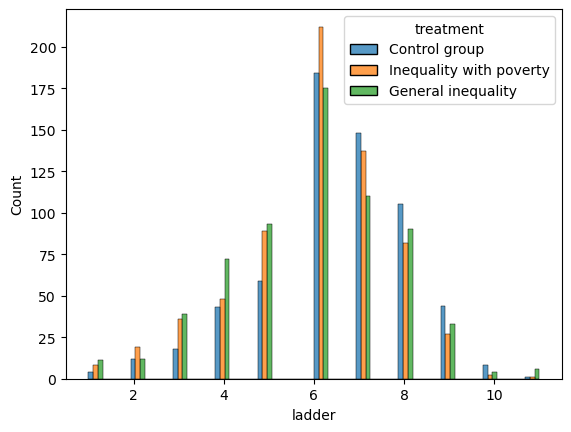

In [20]:
sns.histplot(data=data, x='ladder', hue='treatment', multiple='dodge')

Do you think the normality assumption has been met? 

< your comment here >

## Kruskal-Wallis Test

Either way, run a Krusal-Wallis test with the same variables (ladder, treatment) to check if you get the same result as with ANOVA.


In [37]:
data.dropna()

stats.kruskal(data[data.treatment == 'Inequality with poverty']['ladder'],
              data[data.treatment == 'General inequality']['ladder'],
              data[data.treatment == 'Control group']['ladder'],
              nan_policy = "omit")




KruskalResult(statistic=30.173274271348717, pvalue=2.8051542127865784e-07)

What is the result, and does it agree with the ANOVA?

< your comment here >

## Including age as a control variable

Age is a continuous variable. How could we use ANOVA to test whether there are differences in ‘ladder’ by age? 

Create a new column in the dataframe called `age4`. Make it contain four categories for age:

* under 30
* 30-45
* 45-65
* over 65

Here is some code to get you started:

In [39]:
# create a new column and fill it with NaN for now
data['age4'] = np.nan

# start filling in the values
# if this looks unfamiliar, check Sammi's cheatsheet (chapter 9 of this coursebook)
data.loc[data['age'].isin(range(0, 30)), 'age4'] = "under 30"
data.loc[data['age'].isin(range(30, 45)), 'age4'] = "30 - 45"
data.loc[data['age'].isin(range(45, 65)), 'age4'] = "45 - 65"
data.loc[data['age'].isin(range(65, 150)), 'age4'] = "over 65"


data

,treatment,income,age,ladder,age4
0,Control group,Medium-high,18,3.0,under 30
1,Control group,Low,18,7.0,under 30
2,Control group,Low,19,7.0,under 30
3,Control group,High,19,9.0,under 30
4,Control group,High,19,10.0,under 30
...,...,...,...,...,...
1985,General inequality,Low-medium,80,5.0,over 65
1986,General inequality,Low,81,5.0,over 65
1987,General inequality,Low-medium,82,7.0,over 65
1988,General inequality,Low,83,6.0,over 65


Now run an ANOVA including `age4` as a control variable

In [42]:
# First we create the ANOVA model:
inequality_lm = smf.ols('ladder ~ treatment + age4', data=data).fit()

# Then output the ANOVA table
table = sm.stats.anova_lm(inequality_lm) 
print(table)

               df       sum_sq    mean_sq          F        PR(>F)
treatment     2.0    83.063114  41.531557  14.201016  7.544136e-07
age4          3.0   114.285700  38.095233  13.026023  2.012164e-08
Residual   1926.0  5632.680172   2.924548        NaN           NaN


## Extra Exercise: 

Run two-way ANOVAs with interaction terms for:

1. treatment and age 
2. income and age. 

What are the questions you are trying to answer with the interaction terms? (Hint: “Is the effect of treatment the same for….”?)

In [45]:
# First we create the ANOVA model:
inequality_lm = smf.ols('ladder ~ treatment + age4 + age4:treatment', data=data).fit()
# ALTERNATIVE:
#inequality_lm = smf.ols('ladder ~ treatment*age4', data=data).fit()

# Then output the ANOVA table
table = sm.stats.anova_lm(inequality_lm) 
print(table)

                    df       sum_sq    mean_sq          F        PR(>F)
treatment          2.0    83.063114  41.531557  14.183663  7.676708e-07
age4               3.0   114.285700  38.095233  13.010106  2.059808e-08
treatment:age4     6.0    10.677786   1.779631   0.607771  7.243254e-01
Residual        1920.0  5622.002386   2.928126        NaN           NaN


In [44]:
# First we create the ANOVA model:
inequality_lm = smf.ols('ladder ~ income + age4 + age4:income', data=data).fit()

# Then output the ANOVA table
table = sm.stats.anova_lm(inequality_lm) 
print(table)

                 df       sum_sq     mean_sq           F        PR(>F)
income          3.0  1067.265637  355.755212  154.855838  7.318036e-90
age4            3.0   301.793145  100.597715   43.788939  2.289124e-27
age4:income     9.0    59.282840    6.586982    2.867232  2.304574e-03
Residual     1916.0  4401.687365    2.297332         NaN           NaN
